# SMOTE를 통한 OVERSAMPLING 

In [2]:
import pandas as pd
import numpy as np
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import f1_score
from tqdm import tqdm
from sklearn.metrics import roc_auc_score

import warnings
warnings.filterwarnings(action='ignore')

import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px

import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'malgun gothic'
from sklearn.metrics import accuracy_score, log_loss, plot_confusion_matrix

from imblearn.over_sampling import SMOTE
from scipy import stats

C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\.libs\libopenblas.QVLO2T66WEPI7JZ63PS3HMOHFEY472BC.gfortran-win_amd64.dll
C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


## ANOVA FEATURE SELECTION 데이터 사용 

In [3]:
anova = pd.read_csv(r'..\..\..\Data\데이터정리중\feature selection\feature_selection_ANOVA_139_full.csv', index_col = 0)

In [13]:
anova

,회사명,거래소코드,회계년도,소속코드,상장폐지일,감사의견코드,자산총계_요약_,유동자산_요약_,당좌자산_요약_,현금_및_현금성자산_요약_,...,총자본투자효율_1,종업원수,PBR_Price_book_value_ratio__최고_,PBR_Price_book_value_ratio__최저_,기업가치_EV_,EBITDA,부도,년,key,공시제목
0,(주)CMG제약,58820.0,2000/12,5.0,0,UQ,28990.0,21169.0,10541.0,4330.0,...,0.00,0.0,0.00,0.00,0.00,0.00,1.0,2001.0,588202001,0
1,(주)CMG제약,58820.0,2001/12,5.0,0,UQ,20908.0,16359.0,2307.0,1829.0,...,8.76,120.0,0.00,0.00,0.00,0.00,1.0,2002.0,588202002,0
2,(주)CMG제약,58820.0,2002/12,5.0,0,UQ,15401.0,9880.0,1436.0,355.0,...,0.79,68.0,0.00,0.00,0.00,0.00,1.0,2003.0,588202003,0
3,(주)CMG제약,58820.0,2003/12,5.0,0,UQ,11063.0,8534.0,1083.0,2.0,...,16.80,23.0,0.00,0.00,0.00,0.00,1.0,2004.0,588202004,0
4,(주)CMG제약,58820.0,2004/12,5.0,0,UQ,5179.0,3893.0,445.0,11.0,...,-37.94,15.0,0.00,0.00,0.00,0.00,1.0,2005.0,588202005,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27352,흥구석유(주),24060.0,2016/12,5.0,0,UQ,79137.0,14794.0,12274.0,1440.0,...,8.84,96.0,0.92,0.59,55934.79,1348.52,1.0,2017.0,240602017,0
27353,흥구석유(주),24060.0,2017/12,5.0,0,UQ,79912.0,15880.0,13124.0,1588.0,...,8.80,93.0,0.77,0.55,46036.63,1147.56,1.0,2018.0,240602018,0
27354,흥구석유(주),24060.0,2018/12,5.0,0,UQ,75206.0,12515.0,11029.0,4017.0,...,9.80,84.0,0.97,0.57,36557.57,1451.79,1.0,2019.0,240602019,0
27355,흥구석유(주),24060.0,2019/12,5.0,0,UQ,83661.0,22620.0,19701.0,2318.0,...,18.02,79.0,1.72,0.50,78081.78,1009.25,1.0,2020.0,240602020,0


In [15]:
numerical_feats = X.dtypes[anova.dtypes != "object"].index.tolist()
print("Number of Numerical features: ", len(numerical_feats))

categorical_feats = X.dtypes[anova.dtypes == "object"].index.tolist()
print("Number of Categorical features: ", len(categorical_feats))

Number of Numerical features:  142
Number of Categorical features:  4


In [4]:
X = anova.drop(columns=['부도'])
y = anova[['부도']]

In [5]:
#모델 적용 데이터 칼럼 고름 재무feature+부도여부
col = X.columns[6:144]
X = X[col]
#fillna(0)
X = X.fillna(0)

In [23]:
X

,자산총계_요약_,유동자산_요약_,당좌자산_요약_,현금_및_현금성자산_요약_,단기투자자산_요약_,단기예금_요약_,단기매매증권_요약_,단기대여금_요약_,기타단기투자자산_요약_,매출채권_요약_,...,부가가치_1,법인세비용차감전_계속사업_손익,금융비용,종업원1인당_부가가치_1,총자본투자효율_1,종업원수,PBR_Price_book_value_ratio__최고_,PBR_Price_book_value_ratio__최저_,기업가치_EV_,EBITDA
0,28990.0,21169.0,10541.0,4330.0,4552.0,4539.0,1.0,13.0,0.0,786.0,...,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00
1,20908.0,16359.0,2307.0,1829.0,18.0,0.0,6.0,13.0,0.0,14.0,...,1831.07,111.85,237.42,15.26,8.76,120.0,0.00,0.00,0.00,0.00
2,15401.0,9880.0,1436.0,355.0,246.0,240.0,6.0,0.0,0.0,26.0,...,121.48,-3225.33,352.83,1.79,0.79,68.0,0.00,0.00,0.00,0.00
3,11063.0,8534.0,1083.0,2.0,381.0,380.0,0.0,0.0,1.0,72.0,...,1858.57,154.75,207.39,80.81,16.80,23.0,0.00,0.00,0.00,0.00
4,5179.0,3893.0,445.0,11.0,0.0,0.0,0.0,0.0,0.0,33.0,...,-1965.01,-2819.13,122.04,-131.00,-37.94,15.0,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27352,79137.0,14794.0,12274.0,1440.0,5065.0,0.0,0.0,0.0,5065.0,5158.0,...,6993.48,2746.52,26.86,72.85,8.84,96.0,0.92,0.59,55934.79,1348.52
27353,79912.0,15880.0,13124.0,1588.0,5058.0,0.0,0.0,0.0,5058.0,6315.0,...,7031.28,2570.80,106.86,75.61,8.80,93.0,0.77,0.55,46036.63,1147.56
27354,75206.0,12515.0,11029.0,4017.0,5.0,0.0,0.0,0.0,5.0,4403.0,...,7373.52,3013.26,-19.39,87.78,9.80,84.0,0.97,0.57,36557.57,1451.79
27355,83661.0,22620.0,19701.0,2318.0,11472.0,0.0,0.0,0.0,11472.0,5161.0,...,15072.74,10814.52,-187.36,190.79,18.02,79.0,1.72,0.50,78081.78,1009.25


In [24]:
y['부도'].value_counts()

1.0    26915
0.0      442
Name: 부도, dtype: int64

### SMOTE
수가 적은 클래스의 점 하나를 선택해 K개의 가까운 샘플을 찾아 그 사이에 새로운 점 생성<BR>
부트스트랩 or KNN(최근접이웃) 모델 기법 활용

In [6]:
# 부도 칼럼을 기준으로 오버샘플링
sm = SMOTE() #k_neighbors , random_state

X_resample, y_resample = sm.fit_resample(X, y)

print('Before OverSampling, the shape of X: {}'.format(X.shape))
print('Before OverSampling, the shape of y: {}'.format(y.shape))
print(y['부도'].value_counts())
print('After OverSampling, the shape of X: {}'.format(X_resample.shape))
print('After OverSampling, the shape of y: {}'.format(y_resample.shape))
print(y_resample['부도'].value_counts())

Before OverSampling, the shape of X: (27357, 138)
Before OverSampling, the shape of y: (27357, 1)
1.0    26915
0.0      442
Name: 부도, dtype: int64
After OverSampling, the shape of X: (53830, 138)
After OverSampling, the shape of y: (53830, 1)
1.0    26915
0.0    26915
Name: 부도, dtype: int64


1.0    26915
0.0    26915
Name: 부도, dtype: int64


<AxesSubplot:>

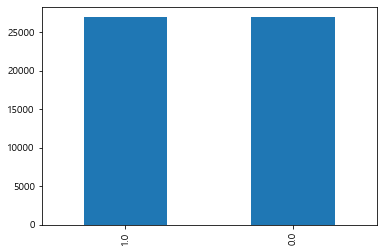

In [26]:
#부도 건수 시각화
print(y_resample['부도'].value_counts())
y_resample['부도'].value_counts().plot(kind = 'bar')

In [31]:
y_resample

,부도
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
53825,0.0
53826,0.0
53827,0.0
53828,0.0


In [7]:
df_new = X_resample

In [8]:
df_new['부도'] = y_resample['부도']

In [9]:
df_new['부도'].value_counts()

1.0    26915
0.0    26915
Name: 부도, dtype: int64

In [10]:
bankrupt_0 = df_new.loc[df_new['부도'] == 0].drop(columns=['부도'])
bankrupt_1 = df_new.loc[df_new['부도'] == 1].drop(columns=['부도'])

In [12]:
stats.ttest_ind(bankrupt_0, bankrupt_1)[1] <0.05

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

### ROSE
https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.RandomOverSampler.html#imblearn.over_sampling.RandomOverSampler <br>
https://imbalanced-learn.org/stable/over_sampling.html

In [99]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_ros, y_ros = ros.fit_resample(X, y)

In [100]:
X_ros

,자산총계_요약_,유동자산_요약_,당좌자산_요약_,현금_및_현금성자산_요약_,단기투자자산_요약_,단기예금_요약_,단기매매증권_요약_,단기대여금_요약_,기타단기투자자산_요약_,매출채권_요약_,...,부가가치_1,법인세비용차감전_계속사업_손익,금융비용,종업원1인당_부가가치_1,총자본투자효율_1,종업원수,PBR_Price_book_value_ratio__최고_,PBR_Price_book_value_ratio__최저_,기업가치_EV_,EBITDA
0,28990.0,21169.0,10541.0,4330.0,4552.0,4539.0,1.0,13.0,0.0,786.0,...,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00
1,20908.0,16359.0,2307.0,1829.0,18.0,0.0,6.0,13.0,0.0,14.0,...,1831.07,111.85,237.42,15.26,8.76,120.0,0.00,0.00,0.00,0.00
2,15401.0,9880.0,1436.0,355.0,246.0,240.0,6.0,0.0,0.0,26.0,...,121.48,-3225.33,352.83,1.79,0.79,68.0,0.00,0.00,0.00,0.00
3,11063.0,8534.0,1083.0,2.0,381.0,380.0,0.0,0.0,1.0,72.0,...,1858.57,154.75,207.39,80.81,16.80,23.0,0.00,0.00,0.00,0.00
4,5179.0,3893.0,445.0,11.0,0.0,0.0,0.0,0.0,0.0,33.0,...,-1965.01,-2819.13,122.04,-131.00,-37.94,15.0,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53825,34650.0,23288.0,18166.0,365.0,8514.0,3560.0,0.0,4954.0,0.0,5652.0,...,-568.30,-5023.08,1114.34,-3.60,-1.64,158.0,13.39,0.95,35272.69,-444.76
53826,9448.0,7521.0,7521.0,12.0,2500.0,0.0,0.0,2500.0,0.0,0.0,...,-228.40,-1208.22,942.94,-19.03,-2.42,12.0,34.12,0.87,-12.27,-351.69
53827,64133.0,12356.0,10589.0,166.0,1242.0,281.0,0.0,961.0,0.0,6903.0,...,-19592.98,-27355.82,1615.19,-236.06,-30.55,83.0,6.29,0.47,36827.17,-2238.28
53828,20419.0,7061.0,7023.0,1868.0,3220.0,10.0,0.0,3210.0,0.0,296.0,...,-1898.45,-6229.81,69.21,-22.33,-9.30,85.0,1.02,0.18,6908.20,-2410.23


1.0    26915
0.0    26915
Name: 부도, dtype: int64


<AxesSubplot:>

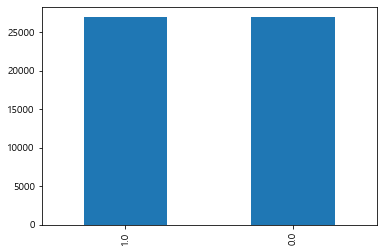

In [101]:
#부도 건수 시각화
print(y_ros['부도'].value_counts())
y_ros['부도'].value_counts().plot(kind = 'bar')

In [105]:
df_ros = X_ros

In [106]:
df_ros['부도'] = y_ros['부도']

In [107]:
df_ros

,자산총계_요약_,유동자산_요약_,당좌자산_요약_,현금_및_현금성자산_요약_,단기투자자산_요약_,단기예금_요약_,단기매매증권_요약_,단기대여금_요약_,기타단기투자자산_요약_,매출채권_요약_,...,법인세비용차감전_계속사업_손익,금융비용,종업원1인당_부가가치_1,총자본투자효율_1,종업원수,PBR_Price_book_value_ratio__최고_,PBR_Price_book_value_ratio__최저_,기업가치_EV_,EBITDA,부도
0,28990.0,21169.0,10541.0,4330.0,4552.0,4539.0,1.0,13.0,0.0,786.0,...,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,1.0
1,20908.0,16359.0,2307.0,1829.0,18.0,0.0,6.0,13.0,0.0,14.0,...,111.85,237.42,15.26,8.76,120.0,0.00,0.00,0.00,0.00,1.0
2,15401.0,9880.0,1436.0,355.0,246.0,240.0,6.0,0.0,0.0,26.0,...,-3225.33,352.83,1.79,0.79,68.0,0.00,0.00,0.00,0.00,1.0
3,11063.0,8534.0,1083.0,2.0,381.0,380.0,0.0,0.0,1.0,72.0,...,154.75,207.39,80.81,16.80,23.0,0.00,0.00,0.00,0.00,1.0
4,5179.0,3893.0,445.0,11.0,0.0,0.0,0.0,0.0,0.0,33.0,...,-2819.13,122.04,-131.00,-37.94,15.0,0.00,0.00,0.00,0.00,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53825,34650.0,23288.0,18166.0,365.0,8514.0,3560.0,0.0,4954.0,0.0,5652.0,...,-5023.08,1114.34,-3.60,-1.64,158.0,13.39,0.95,35272.69,-444.76,0.0
53826,9448.0,7521.0,7521.0,12.0,2500.0,0.0,0.0,2500.0,0.0,0.0,...,-1208.22,942.94,-19.03,-2.42,12.0,34.12,0.87,-12.27,-351.69,0.0
53827,64133.0,12356.0,10589.0,166.0,1242.0,281.0,0.0,961.0,0.0,6903.0,...,-27355.82,1615.19,-236.06,-30.55,83.0,6.29,0.47,36827.17,-2238.28,0.0
53828,20419.0,7061.0,7023.0,1868.0,3220.0,10.0,0.0,3210.0,0.0,296.0,...,-6229.81,69.21,-22.33,-9.30,85.0,1.02,0.18,6908.20,-2410.23,0.0


In [108]:
bankrupt_0_ros = df_ros.loc[df_ros['부도'] == 0].drop(columns=['부도'])
bankrupt_1_ros = df_ros.loc[df_ros['부도'] == 1].drop(columns=['부도'])

In [109]:
stats.ttest_ind(bankrupt_0_ros, bankrupt_1_ros)[1] <0.05

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

### Z-score 
Z-score 표준편차 검증<br>
T-score 평균 검증<br>

<br>
https://www.geeksforgeeks.org/scipy-stats-zscore-function-python/ <br>
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.zscore.html

In [ ]:
#데이터프레임 돌리는 코드
z_bankrupt_0 = bankrupt_0.apply(stats.zscore)
z_bankrupt_0

z=abs(z_bankrupt_0['자산총계_요약_'])>3
z.value_counts()
print ("\nZ-score for arr2 : \n", stats.zscore(df_new))
#print ("\nZ-score for arr2 : \n", stats.zscore(arr2, axis = 1))

